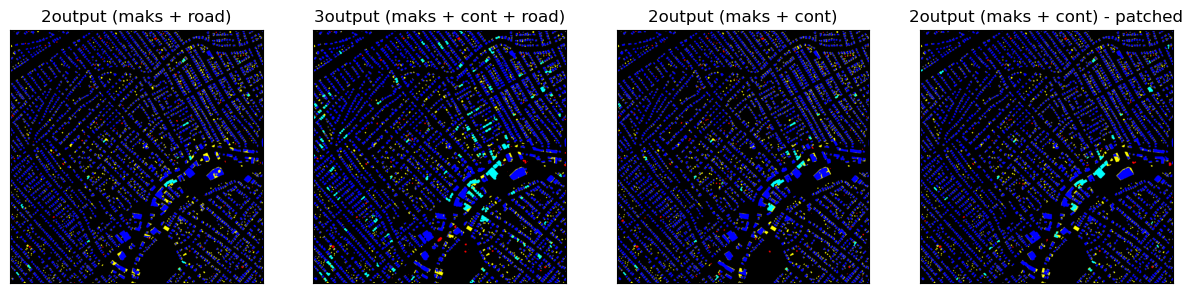

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def calculate_and_color_buildings(ground_truth, prediction):
    # Threshold images to binary
    _, binary_ground_truth = cv2.threshold(ground_truth, 128, 255, cv2.THRESH_BINARY)
    _, binary_prediction = cv2.threshold(prediction, 128, 255, cv2.THRESH_BINARY)

    # Label the buildings
    num_labels_ground_truth, labels_ground_truth = cv2.connectedComponents(binary_ground_truth)
    num_labels_prediction, labels_prediction = cv2.connectedComponents(binary_prediction)
    
    # Create an output image with 3 channels (for BGR)
    output_image = np.zeros((prediction.shape[0], prediction.shape[1], 3), dtype=np.uint8)

    # Define colors in BGR
    ground_truth_color = (0, 255, 255)  # Yellow for ground truth
    non_conjoined_color = (255, 0, 0)  # Blue for non-conjoined predictions
    conjoined_color = (255, 255, 0)  # Cyan for conjoined predictions
    false_positive_color = (0, 0, 255)  # Red for false positives

    # Color the ground truth buildings in yellow
    for label_gt in range(1, num_labels_ground_truth):
        gt_building_mask = (labels_ground_truth == label_gt)
        output_image[gt_building_mask] = ground_truth_color

    # Color the prediction buildings
    for label_pred in range(1, num_labels_prediction):
        pred_building_mask = (labels_prediction == label_pred)
        overlapping_gt_labels = np.unique(labels_ground_truth[pred_building_mask])
        
        # Check if the prediction is a false positive
        if len(overlapping_gt_labels) == 1 and overlapping_gt_labels[0] == 0:
            # Color the false positive in red
            output_image[pred_building_mask] = false_positive_color
        else:
            # Check if the prediction is conjoined
            is_conjoined = len(overlapping_gt_labels) - 1 > 1  # Subtract 1 for the background label
            # Color the building in cyan if it's conjoined, otherwise in blue
            color = conjoined_color if is_conjoined else non_conjoined_color
            output_image[pred_building_mask] = color

    return binary_ground_truth, binary_prediction, output_image



ground_truth_img = cv2.imread('/home/sara/Downloads/Datasets_Buildetection/massachusetts-buildings-dataset/tiff/test_labels/22828930_15.tif', 0)
prediction_img1 = cv2.imread('/home/sara/Desktop/predictions/2output_buildignandroad/predicted_image_0.png', 0)
prediction_img2 = cv2.imread('/home/sara/Desktop/predictions/Predicted_roads/predicted_image_0.png', 0)
prediction_img3 = cv2.imread('/home/sara/Desktop/predictions/Predicted_masks/predicted_image_0.png', 0)
prediction_img4 = cv2.imread('/home/sara/Desktop/download.png', 0)

binary_ground_truth1, binary_prediction1, colored_output_image1 = calculate_and_color_buildings(ground_truth_img, prediction_img1)
binary_ground_truth2, binary_prediction2, colored_output_image2 = calculate_and_color_buildings(ground_truth_img, prediction_img2)
binary_ground_truth3, binary_prediction3, colored_output_image3 = calculate_and_color_buildings(ground_truth_img, prediction_img3)
binary_ground_truth4, binary_prediction4, colored_output_image4 = calculate_and_color_buildings(ground_truth_img, prediction_img4)

# Plot the result
plt.figure(figsize=(15, 8))
plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(colored_output_image1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying

# Create legend patches
ground_truth_patch = mpatches.Patch(color='yellow', label='Ground Truth')
non_conjoined_patch = mpatches.Patch(color='blue', label='Non-Conjoined Prediction')
conjoined_patch = mpatches.Patch(color='cyan', label='Conjoined Prediction')
false_positive_patch = mpatches.Patch(color='red', label='False Positive')

# Add legend to plot
# plt.legend(handles=[ground_truth_patch, non_conjoined_patch, conjoined_patch, false_positive_patch], loc='upper right')

# Remove axis ticks
plt.xticks([])
plt.yticks([])
plt.title('2output (maks + road)')
# plt.subplot(1, 2, 2)
# plt.imshow(ground_truth_img, cmap='gray')
# plt.axis('off')
# Show the plot
plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(colored_output_image2, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying

# Create legend patches
ground_truth_patch = mpatches.Patch(color='yellow', label='Ground Truth')
non_conjoined_patch = mpatches.Patch(color='blue', label='Non-Conjoined Prediction')
conjoined_patch = mpatches.Patch(color='cyan', label='Conjoined Prediction')
false_positive_patch = mpatches.Patch(color='red', label='False Positive')

# Add legend to plot
# plt.legend(handles=[ground_truth_patch, non_conjoined_patch, conjoined_patch, false_positive_patch], loc='upper right')

# Remove axis ticks
plt.xticks([])
plt.yticks([])
plt.title('3output (maks + cont + road)')
# plt.savefig('/home/sara/Desktop/predictions/plots/Color_coded_UNet/combined_10.png')
plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(colored_output_image3, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying

# Create legend patches
# ground_truth_patch = mpatches.Patch(color='yellow', label='Ground Truth')
# non_conjoined_patch = mpatches.Patch(color='blue', label='Non-Conjoined Prediction')
# conjoined_patch = mpatches.Patch(color='cyan', label='Conjoined Prediction')
# false_positive_patch = mpatches.Patch(color='red', label='False Positive')

# Add legend to plot
# plt.legend(handles=[ground_truth_patch, non_conjoined_patch, conjoined_patch, false_positive_patch], loc='upper right')

# Remove axis ticks
plt.xticks([])
plt.yticks([])
plt.title('2output (maks + cont)')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(colored_output_image4, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying

# Create legend patches
# ground_truth_patch = mpatches.Patch(color='yellow', label='Ground Truth')
# non_conjoined_patch = mpatches.Patch(color='blue', label='Non-Conjoined Prediction')
# conjoined_patch = mpatches.Patch(color='cyan', label='Conjoined Prediction')
# false_positive_patch = mpatches.Patch(color='red', label='False Positive')

# Add legend to plot
# plt.legend(handles=[ground_truth_patch, non_conjoined_patch, conjoined_patch, false_positive_patch], loc='upper right')

# Remove axis ticks
plt.xticks([])
plt.yticks([])
plt.title('2output (maks + cont) - patched')

plt.savefig('/home/sara/Desktop/multiUNET_Building_0.png')
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()
